### Problem Statement

Cedar valley Iowa realty is a realtor firm who has given our consulting firm(Logical Inc) a project to create a model for sale price of housing. We as a data science team will be working towards creating the model and analysing features which has the highest impact on Sale Price of houses.

### Ames, Iowa housing analysis

In [7227]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

### Importing the dataset

In [7228]:
# load the dataset
df_train = pd.read_csv('datasets/train.csv',keep_default_na = False, na_values = [''])
df_test = pd.read_csv('datasets/test.csv',keep_default_na = False, na_values = [''])

In [7229]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [7230]:
# check the summary of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7231]:
# check null columns
df_train.isnull().sum().sort_values(ascending= False)

Lot Frontage     330
Garage Yr Blt    114
Mas Vnr Type      22
Mas Vnr Area      22
Bsmt Exposure      4
                ... 
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [7232]:
def show_na_sum(df, column):
    # Shows a count of missing values in a specific column
    return df[column].isna().sum()

In [7233]:
def fix_na(df, column, value):
    # Fill missing data points with a specific function
    df[column] = df[column].fillna(value)

In [7234]:
def change_dtype(df, column, map_fxn):
    # Convert a column to a new data type
    df[column] = df[column].map(map_fxn)

### Fixing null values

#### Lot Frontage

In [7235]:
# Clean Train Data
fix_na(df_train, 'Lot Frontage', df_train['Lot Frontage'].mean())

In [7236]:
# Clean Test Data
fix_na(df_test, 'Lot Frontage', df_test['Lot Frontage'].mean())

#### Garage Yr Built

In [7237]:
show_na_sum(df_train, 'Garage Yr Blt')

114

In [7238]:
# Fix Train Data
fix_na(df_train, 'Garage Yr Blt', 0)

In [7239]:
# Fix Test Data
fix_na(df_test, 'Garage Yr Blt', 0)

#### Masonry Veneer Area (Mas Vnr Area)

In [7240]:
show_na_sum(df_train, 'Mas Vnr Area')

22

In [7241]:
# Fix Train Data
fix_na(df_train, 'Mas Vnr Area', 0)

In [7242]:
# Fix Test Data
fix_na(df_test, 'Mas Vnr Area', 0)

#### Masonry Veneer Type (Mas Vnr Type)

In [7243]:
# Fix Train Data
fix_na(df_train, 'Mas Vnr Type', 0)

In [7244]:
# Fix Test Data
fix_na(df_test, 'Mas Vnr Type', 0)

#### Bsmt Half Bath & Bsmt Unf Sf follow same value type

In [7245]:
fix_na(df_train, 'Bsmt Half Bath', 0)

#### Garage Area & Garage Cars follow same value type

In [7246]:
fix_na(df_train, ['Garage Cars', 'Garage Area'], 0)

#### Total Basement Square Feet (Total Bsmt SF)

In [7247]:
fix_na(df_train, 'Total Bsmt SF', 0)

#### Bsmt Fin SF 1

In [7248]:
fix_na(df_train, 'BsmtFin SF 1', 0)

#### Bsmt Fin SF 2

In [7249]:
fix_na(df_train, 'BsmtFin SF 2', 0)

#### BsmtFin Type 2

In [7250]:
# Fix Train Data
fix_na(df_train, 'BsmtFin Type 2', 'NA')

#### Basement Exposure

In [7251]:
# Fix Train Data
fix_na(df_train, 'Bsmt Exposure', 'NA')

#### Bsmt Full Bath & Half Bath

In [7252]:
# fix basement full and half bath null values
fix_na(df_train, ['Bsmt Full Bath','Bsmt Half Bath'], 0)

#### Basement Quality (Bsmt Qual)

In [7253]:
# Fix Bsmt Qual Data
fix_na(df_train, 'Bsmt Qual', 'NA')

In [7254]:
# fix garage finish for train and test for null values.
fix_na(df_train, 'Garage Finish', 'NA')
fix_na(df_test, 'Garage Finish', 'NA')

In [7255]:
# fix Bsmt Unf Sf null values
fix_na(df_train, 'Bsmt Unf SF', 'NA')

In [7256]:
# fix null values for Garage Quality
fix_na(df_train, 'Garage Qual', 'NA')

In [7257]:
# fix null values for BsmtFin Type 1
fix_na(df_train, 'BsmtFin Type 1', 'NA')

In [7258]:
# fix null values for Bsmt Cond
fix_na(df_train, 'Garage Cond', 'NA')

In [7259]:
# fix null values for Bsmt Cond
fix_na(df_train, 'Bsmt Cond', 'NA')

#### BsmtFin Type 1 for test data only

In [7260]:
# fix text dataset for BsmtFin Type 1 null values
fix_na(df_test, 'BsmtFin Type 1', 'NA')

In [7261]:
# fix text dataset for null values on Electrical feature
fix_na(df_test, 'Electrical', 'NA')

### Histogram of numerical features

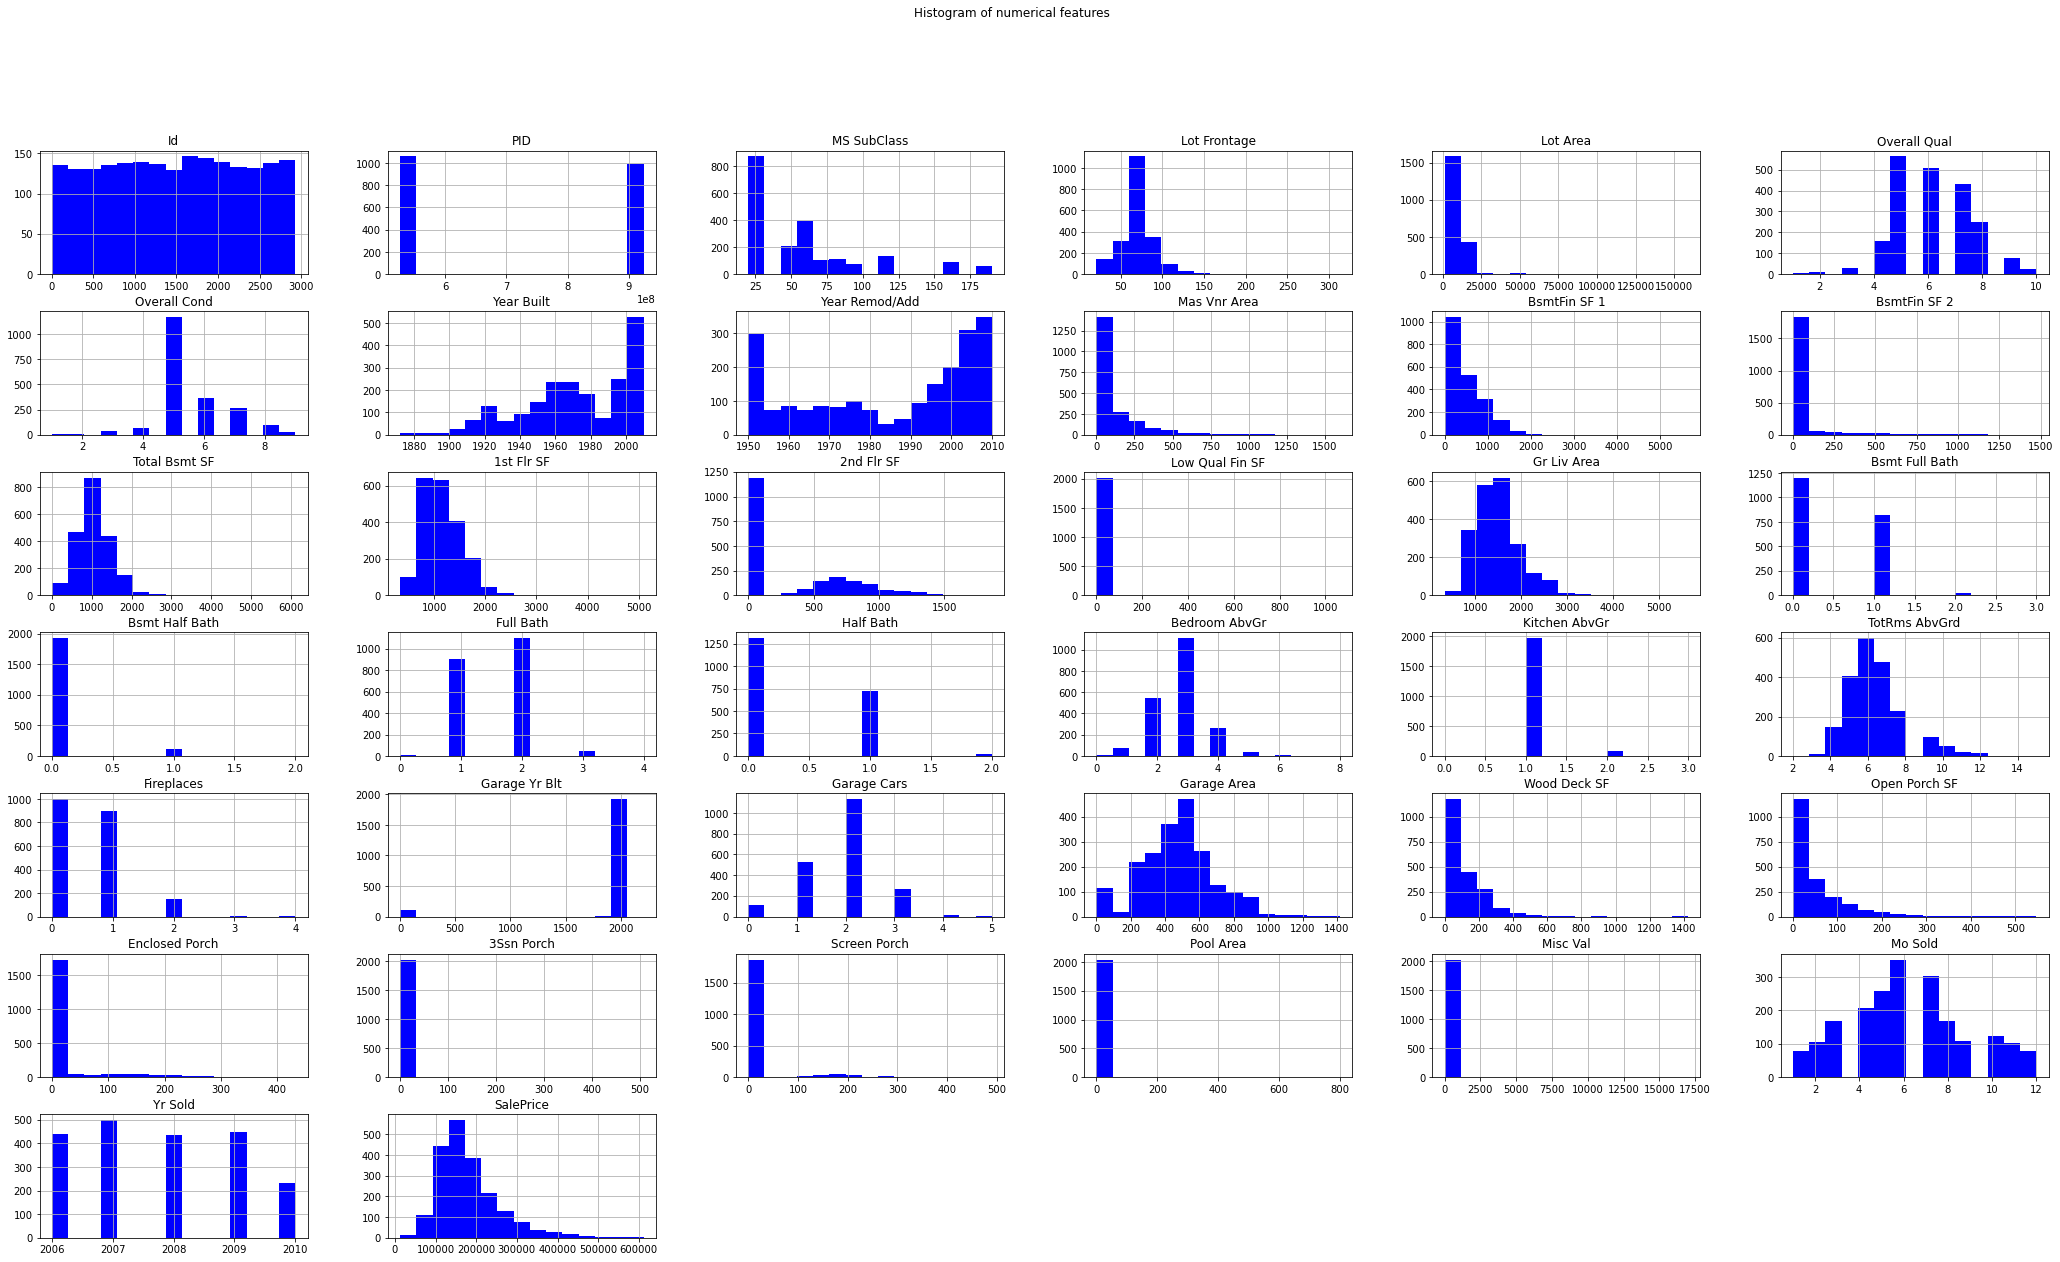

In [7262]:
# data analysis through histogram
df_train.hist(figsize = (36,20), bins = 15, color = 'blue')
plt.suptitle('Histogram of numerical features');

Above we have histogram of all numerical features from the dataset.  
Many features have maximum 0 values or are highly skewed.   

### Feature selection and feature engineering

In [7263]:
(df_train.corr()['SalePrice'].sort_values(ascending=False).map(abs) > .6).index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF',
       'Lot Frontage', 'Lot Area', 'Bsmt Full Bath', 'Half Bath',
       'Garage Yr Blt', '2nd Flr SF', 'Bedroom AbvGr', 'Screen Porch',
       '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val',
       'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Id', 'MS SubClass',
       'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch', 'PID'],
      dtype='object')

**I tried multiple ways to check for multicollinearity and high correlation
  between variable. Below are heatmap, functions to see correlation.**

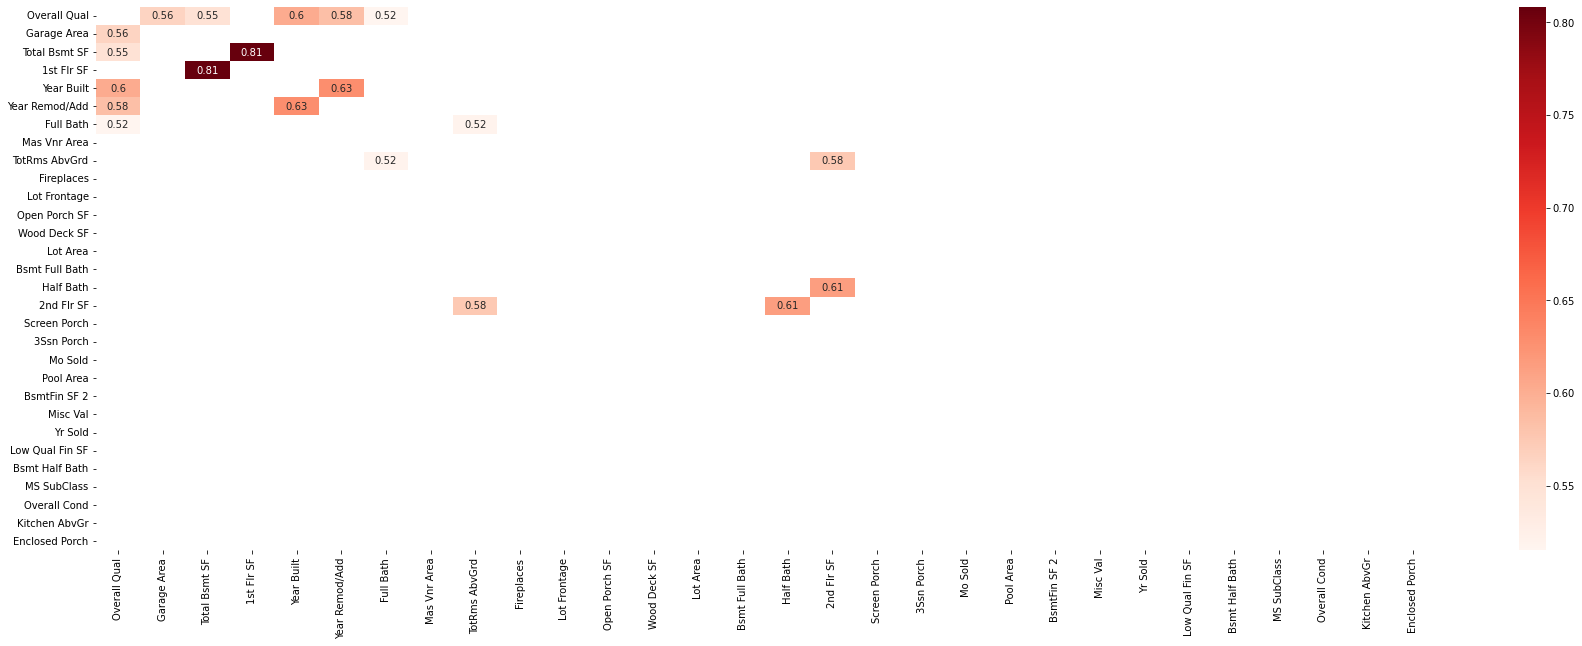

In [7264]:
# checked multicollinearity between columns using mask and heatmap.
dfCorr = df_x.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [7265]:
""" Below is the correlation between sale price with other features.
    Based on above collinearity between features and below with sale price,
    I plan on removing columns with high correlation between features with 
    low correlation with sale price."""

df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.649897
Garage Cars        0.647781
Total Bsmt SF      0.629303
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
TotRms AbvGrd      0.504014
Mas Vnr Area       0.503579
Fireplaces         0.471093
BsmtFin SF 1       0.423856
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Frontage       0.325850
Lot Area           0.296566
Bsmt Full Bath     0.283332
Half Bath          0.283001
Garage Yr Blt      0.258645
2nd Flr SF         0.248452
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016432
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045290
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0.097019
Kitchen AbvGr     -0

In [7266]:
df_test.drop(columns = ['PID'], inplace = True)

In [7267]:
qual_pvt = df_train.pivot_table(index = 'Overall Qual',
                               values = 'SalePrice', aggfunc =np.median)

In [7268]:
# finding correlation between sale price column with other columns with correlation higher than 60%
(df_train.corr()['SalePrice'].sort_values(ascending=False).map(abs) > .6).index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF',
       'Lot Frontage', 'Lot Area', 'Bsmt Full Bath', 'Half Bath',
       'Garage Yr Blt', '2nd Flr SF', 'Bedroom AbvGr', 'Screen Porch',
       '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val',
       'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Id', 'MS SubClass',
       'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch', 'PID'],
      dtype='object')

In [7269]:
# # find multicollinearity between columns using correlation between them.
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df_x, .60)

Overall Qual   Year Built        0.602964
Half Bath      2nd Flr SF        0.614656
Year Built     Year Remod/Add    0.629116
Total Bsmt SF  1st Flr SF        0.808351
Overall Qual   Overall Qual           NaN
dtype: float64

**Justification**
Based on correlation between variable and correlation between variables(multicollinearity), I chose following columns for 
our project. For correlation to sale price and multicolliniearity, I used 60% as a minimum.
Below columns have have multicollinearity.
- Garage Area and Garage Cars.
- Garage Year build and Year Build 
- Garage Living Area and Total Room Above Ground.
- Year Remod/Add abd Garage Yr Blt
- Bedroom AbvGr and  TotRms AbvGrd
- BsmtFin SF 1 and Bsmt Full Bath
- 2nd Flr SF and Gr Liv Area 
- Year Built and Year Remod/Add

From above few column are matching with more than 1 column.
- I removed column which has multicollinearity to another column.
- Such as removed Garage year build instead of year build.
- Removed Bedroom Above garage because it will provide less  
    information than Total Room above ground.


In [7270]:
# Adjusting features which are appropriate for modeling.
df_train = df_train[['Overall Qual', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Lot Frontage',
       'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath',
       'Half Bath', '2nd Flr SF', 'Bsmt Unf SF',
       'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2',
       'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath',
       'MS SubClass', 'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch','SalePrice']]

In [7271]:
# using all numerical columns used in training data to be used in testing data, except sale price
features = ['Overall Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Lot Frontage', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',
       'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2',
       'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath',
       'MS SubClass', 'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch']

In [7272]:
'''refining again to include only number variable. I do understand that above refinemen
did only create numberical feature. But wanted to make sure.'''
df_num = df_train.select_dtypes(include='number')
df_num.head()

,Overall Qual,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Mas Vnr Area,TotRms AbvGrd,Fireplaces,...,BsmtFin SF 2,Misc Val,Yr Sold,Low Qual Fin SF,Bsmt Half Bath,MS SubClass,Overall Cond,Kitchen AbvGr,Enclosed Porch,SalePrice
0,6,475.0,725.0,725,1976,2005,2,289.0,6,0,...,0.0,0,2010,0,0.0,60,8,1,0,130500
1,7,559.0,913.0,913,1996,1997,2,132.0,8,1,...,0.0,0,2009,0,0.0,60,5,1,0,220000
2,5,246.0,1057.0,1057,1953,2007,1,0.0,5,0,...,0.0,0,2010,0,0.0,20,7,1,0,109000
3,5,400.0,384.0,744,2006,2007,2,0.0,7,0,...,0.0,0,2010,0,0.0,60,5,1,0,174000
4,6,484.0,676.0,831,1900,1993,2,0.0,6,0,...,0.0,0,2010,0,0.0,50,8,1,0,138500


In [7273]:
# recheck the refined dataframe
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall Qual     2051 non-null   int64  
 1   Garage Area      2051 non-null   float64
 2   Total Bsmt SF    2051 non-null   float64
 3   1st Flr SF       2051 non-null   int64  
 4   Year Built       2051 non-null   int64  
 5   Year Remod/Add   2051 non-null   int64  
 6   Full Bath        2051 non-null   int64  
 7   Mas Vnr Area     2051 non-null   float64
 8   TotRms AbvGrd    2051 non-null   int64  
 9   Fireplaces       2051 non-null   int64  
 10  Lot Frontage     2051 non-null   float64
 11  Open Porch SF    2051 non-null   int64  
 12  Wood Deck SF     2051 non-null   int64  
 13  Lot Area         2051 non-null   int64  
 14  Bsmt Full Bath   2051 non-null   float64
 15  Half Bath        2051 non-null   int64  
 16  2nd Flr SF       2051 non-null   int64  
 17  Screen Porch  

In [7274]:
# check training and testing data 
df_num.shape,df_test.shape

((2051, 31), (878, 79))

In [7275]:
# using function to create barplot.
def create_bar(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'lightblue', plot_size = (10,6), lw = 1.5):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

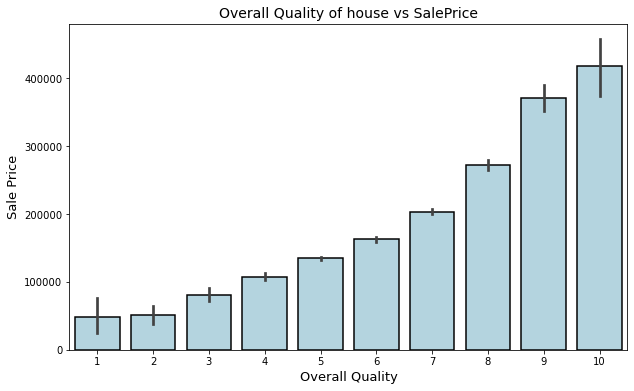

In [7276]:
# create bar plot of overall quality of house with sale price.
create_bar(df_train,
          'Overall Qual', 
          'SalePrice', 
          title='Overall Quality of house vs SalePrice', 
          x_label = 'Overall Quality', 
          y_label = 'Sale Price')
# Higher the overall quality, meant higher sale price of the house

### Summary Statistics

In [7277]:
df_train.describe()

,Overall Qual,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Mas Vnr Area,TotRms AbvGrd,Fireplaces,...,BsmtFin SF 2,Misc Val,Yr Sold,Low Qual Fin SF,Bsmt Half Bath,MS SubClass,Overall Cond,Kitchen AbvGr,Enclosed Porch,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,6.112140,473.440761,1057.471965,1164.488055,1971.708922,1984.190151,1.577279,98.626524,6.435885,0.590931,...,47.935641,51.574354,2007.775719,5.512921,0.063384,57.008776,5.562165,1.042906,22.571916,181469.701609
std,1.426271,216.135102,449.908003,396.446923,30.177889,21.036250,0.549279,174.324690,1.560225,0.638516,...,164.964052,573.393985,1.312014,51.068870,0.251590,42.824223,1.104497,0.209790,59.845110,79258.659352
min,1.000000,0.000000,0.000000,334.000000,1872.000000,1950.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,2006.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,12789.000000
25%,5.000000,319.000000,793.000000,879.500000,1953.500000,1964.500000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,2007.000000,0.000000,0.000000,20.000000,5.000000,1.000000,0.000000,129825.000000
50%,6.000000,480.000000,994.000000,1093.000000,1974.000000,1993.000000,2.000000,0.000000,6.000000,1.000000,...,0.000000,0.000000,2008.000000,0.000000,0.000000,50.000000,5.000000,1.000000,0.000000,162500.000000
75%,7.000000,576.000000,1318.500000,1405.000000,2001.000000,2004.000000,2.000000,159.000000,7.000000,1.000000,...,0.000000,0.000000,2009.000000,0.000000,0.000000,70.000000,6.000000,1.000000,0.000000,214000.000000
max,10.000000,1418.000000,6110.000000,5095.000000,2010.000000,2010.000000,4.000000,1600.000000,15.000000,4.000000,...,1474.000000,17000.000000,2010.000000,1064.000000,2.000000,190.000000,9.000000,3.000000,432.000000,611657.000000


In [7278]:
features = ['Overall Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Lot Frontage', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',
       'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2',
       'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath',
       'MS SubClass', 'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch']

In [7279]:
# function to create box plot for the dataframe.
def create_boxplot(df):
    for col in df.columns:
        sns.boxplot(x=df[col])
        plt.show()

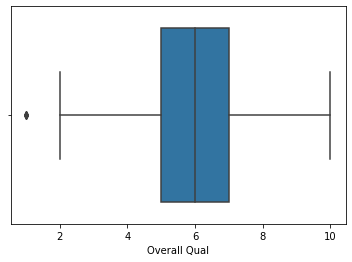

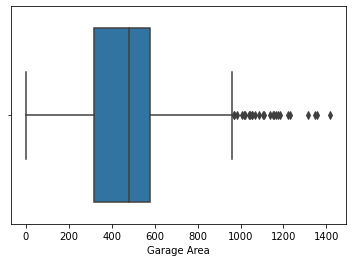

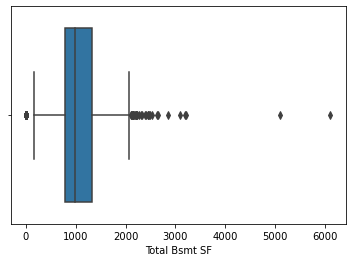

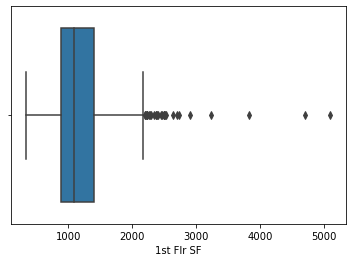

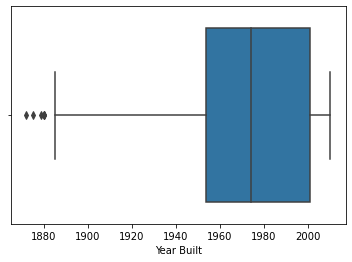

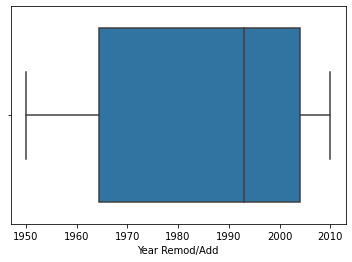

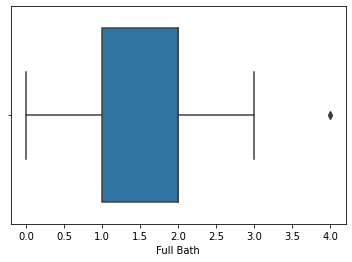

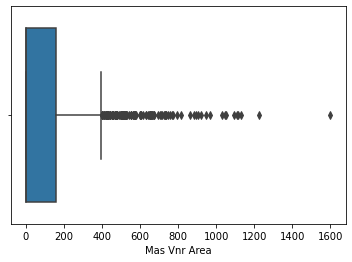

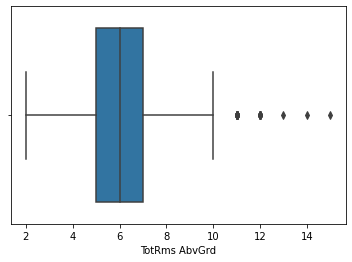

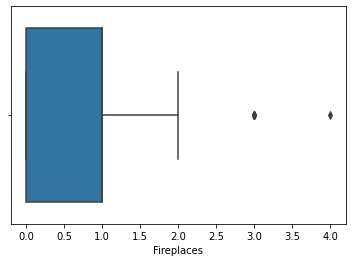

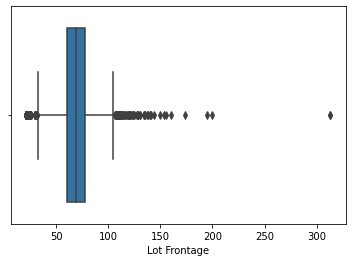

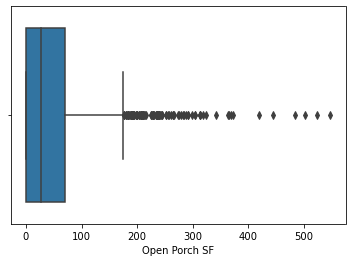

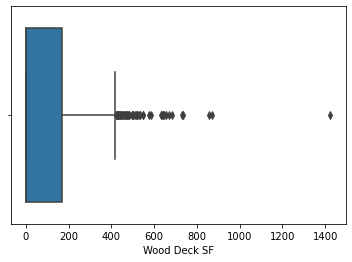

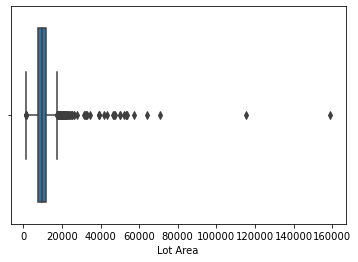

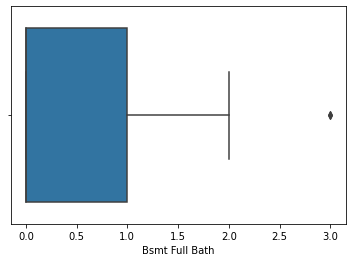

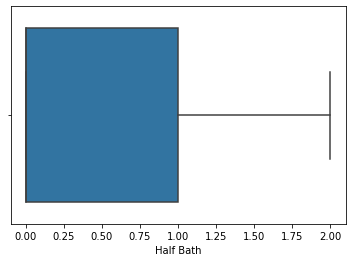

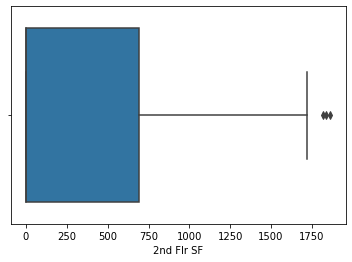

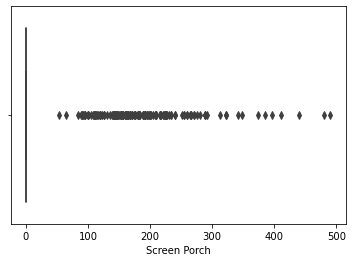

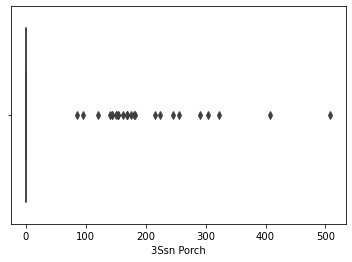

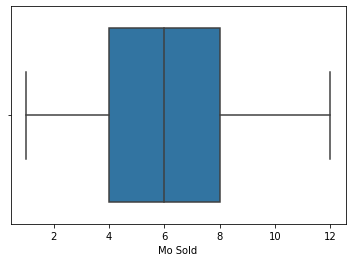

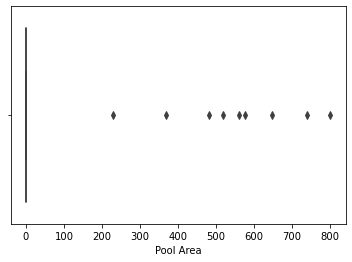

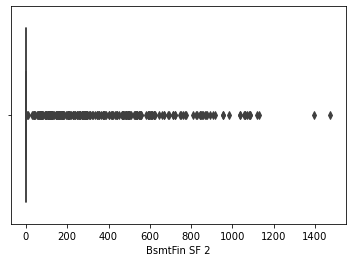

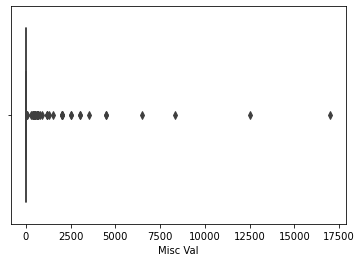

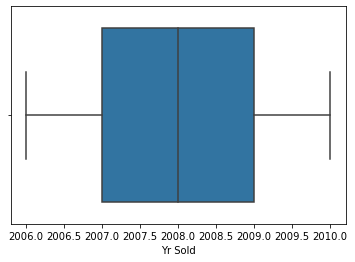

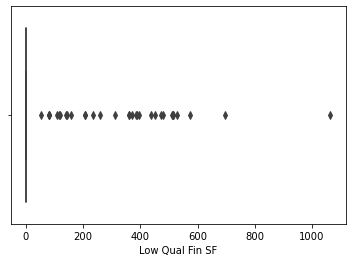

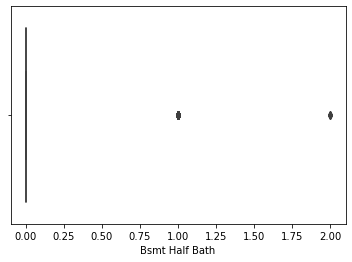

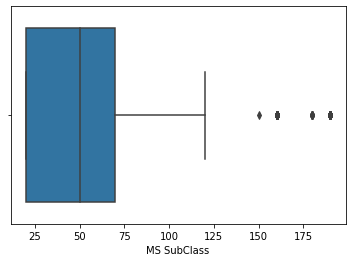

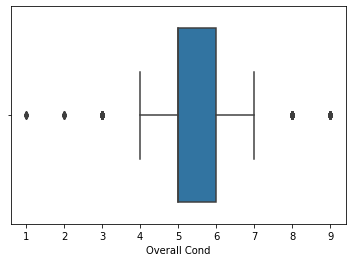

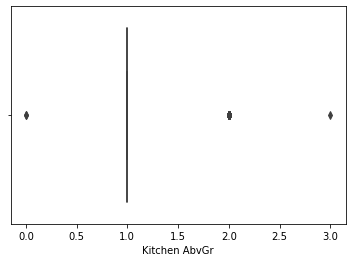

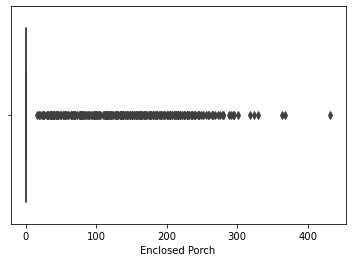

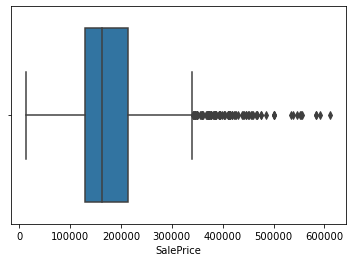

In [7280]:
# call function to create box plot
create_boxplot(df_num)

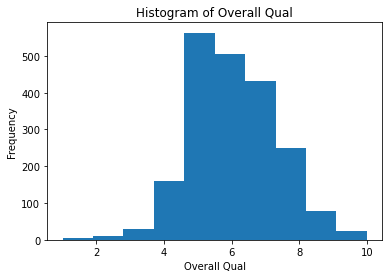

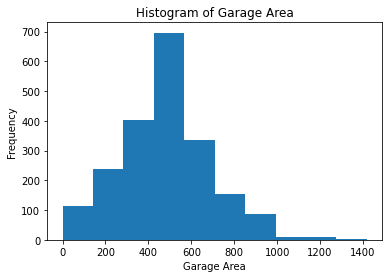

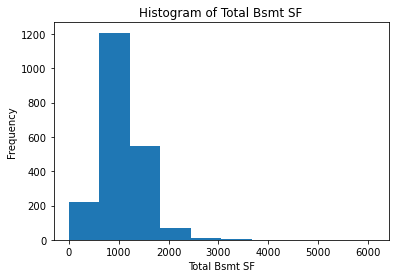

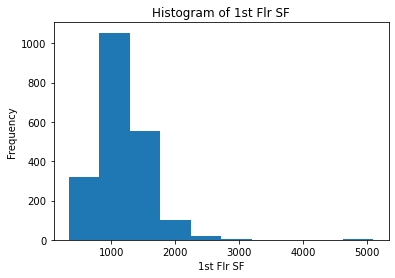

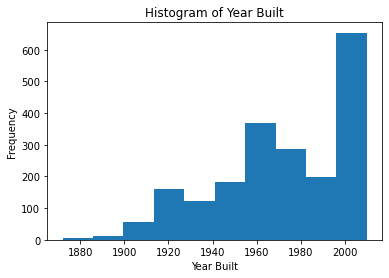

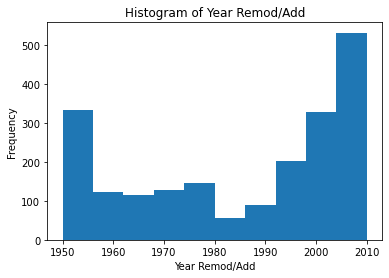

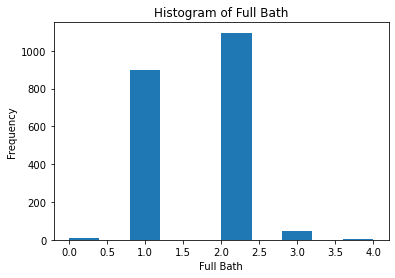

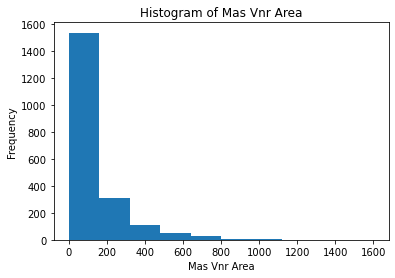

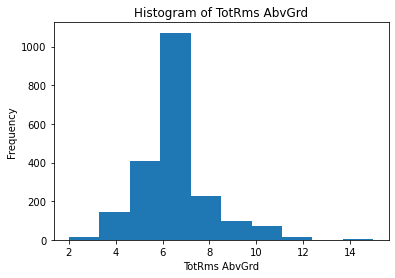

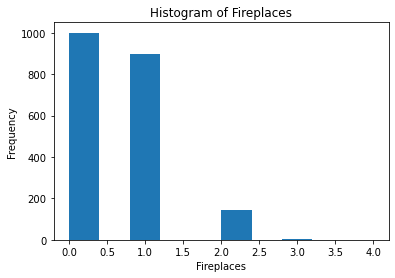

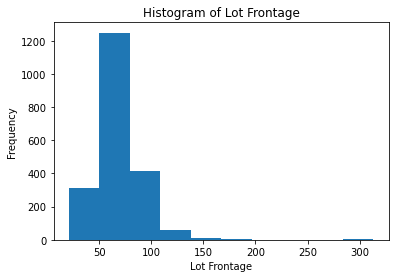

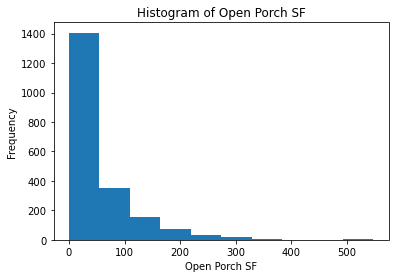

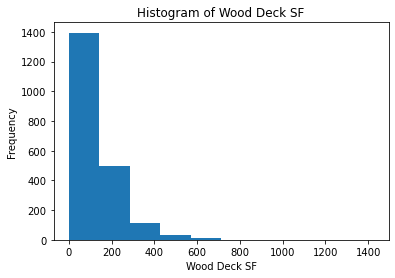

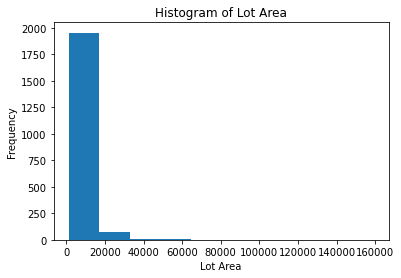

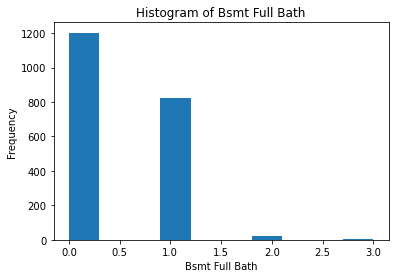

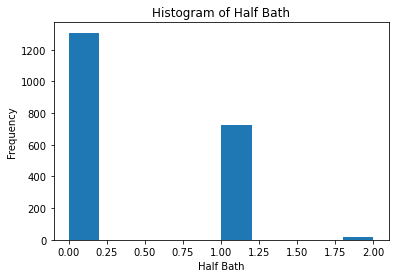

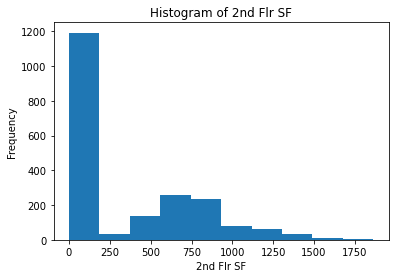

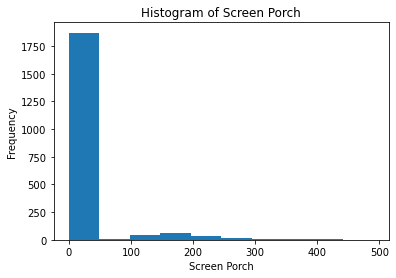

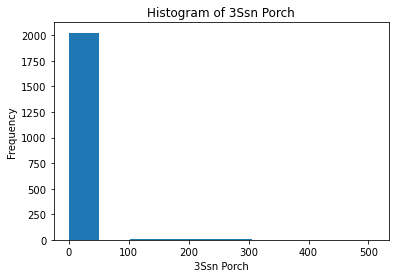

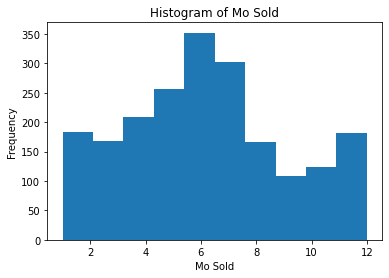

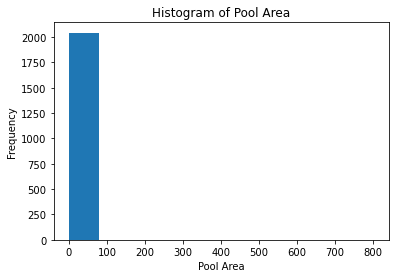

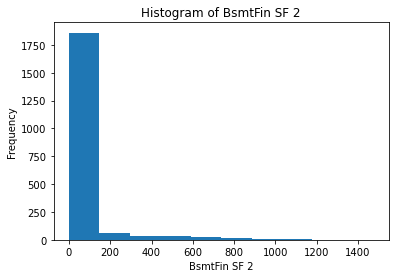

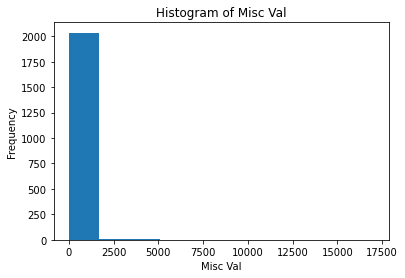

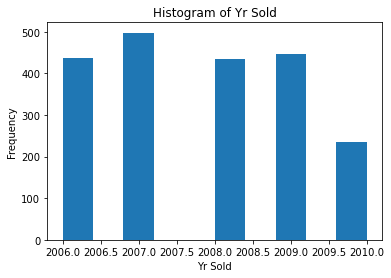

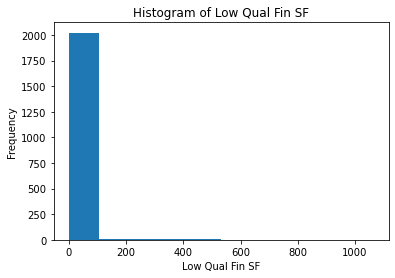

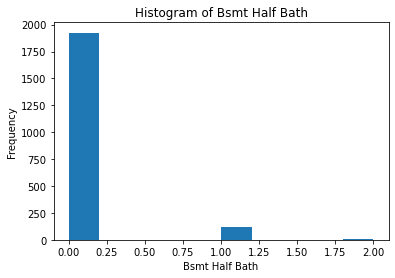

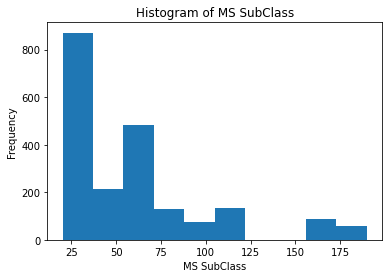

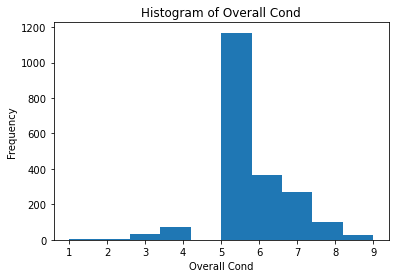

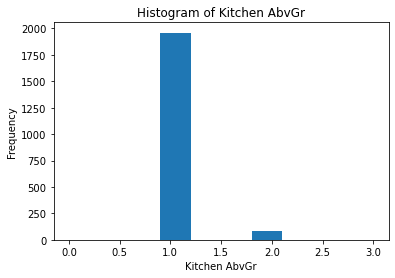

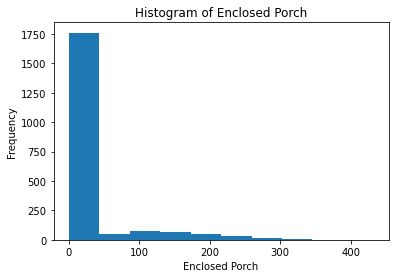

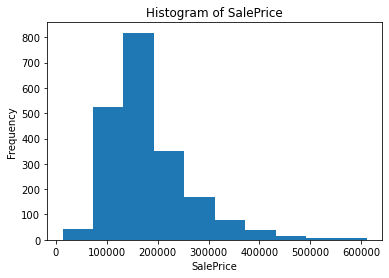

In [7281]:
# function to create histogram
def create_distribution(dataframe):
    for column in dataframe:
        dataframe[column].plot.hist()
        plt.xlabel(column)
        plt.title("Histogram of " + column)
        plt.show()
create_distribution(df_num)

Based on the `boxplot` and `histogram`, the following features are highly skewed  
with maximum value 0's. This will not be beneficial when creating model  
for prediction. It will be better to drop them before model creation.  
- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- Bsmt Half Bath
- ScreenPorch
- PoolArea
- MiscVal
- Kitchen AbvGr

In [7282]:
# removed column mentioned above.
df_num.drop(columns = ['BsmtFin SF 2','Kitchen AbvGr','BsmtFin SF 2',
                        'Low Qual Fin SF',
                        'Enclosed Porch',
                        '3Ssn Porch',
                        'Bsmt Half Bath',
                        'Screen Porch',
                        'Pool Area',
                        'Misc Val'],axis = 1, inplace = True)

In [7283]:
df_num.columns

Index(['Overall Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Lot Frontage', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',
       'Mo Sold', 'Yr Sold', 'MS SubClass', 'Overall Cond', 'SalePrice'],
      dtype='object')

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_num))
df_num = df_num[(z < 3).all(axis=1)]


### Fixing Outliers

In [7284]:
# remove outliers using quantile range.
cols = ['Overall Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Lot Frontage', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',
       'Mo Sold', 'Yr Sold', 'MS SubClass', 'Overall Cond', 'SalePrice'] # columns to be removed outliers from

Q1 = df_num[cols].quantile(0.25)
Q3 = df_num[cols].quantile(0.75)
IQR = Q3 - Q1

df_num = df_num[~((df_num[cols] < (Q1 - 1.5 * IQR)) |(df_num[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Above were boxplot and histogram to check outliers and feature distribution.
Below are data visuals to detect patter and trend.**

In [7285]:
df_num.to_csv('cleaned_df.csv')

### Data Visualization

In [7286]:
df_num.columns

Index(['Overall Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Lot Frontage', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',
       'Mo Sold', 'Yr Sold', 'MS SubClass', 'Overall Cond', 'SalePrice'],
      dtype='object')

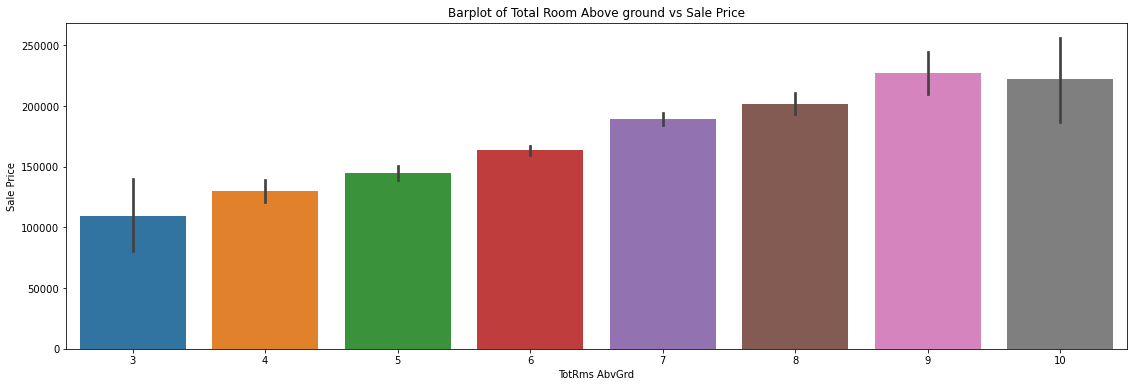

In [7287]:
fix, ax = plt.subplots(figsize = (19,6))
# scatter plot hue_order parameter
sns.barplot(x = "TotRms AbvGrd", y = "SalePrice", data = df_num)
plt.ylabel('Sale Price')
plt.title('Barplot of Total Room Above ground vs Sale Price');
plt.savefig('overallcond_saleprice.png')

**Interpretation**  
- There is a positive linear relationship between total rooms and sale price.
  This means that as the number of rooms in a house increases, so does the sale price of the house.

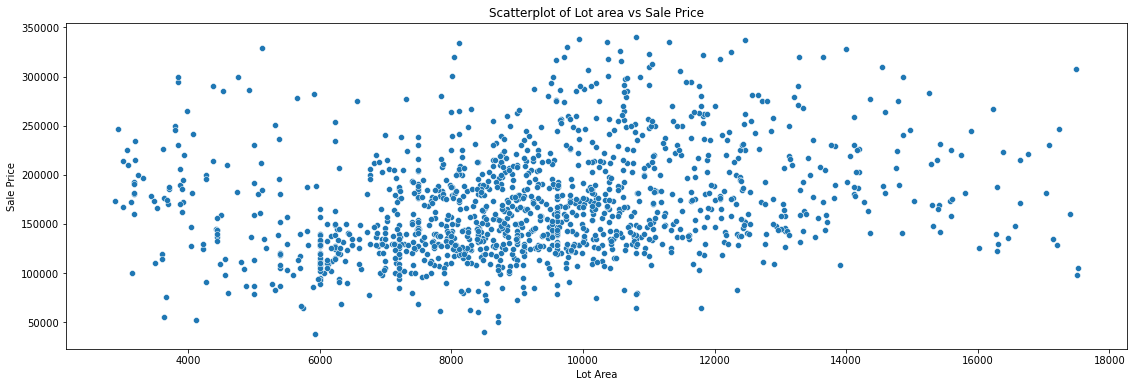

In [7288]:
fix, ax = plt.subplots(figsize = (19,6))
# scatter plot hue_order parameter
sns.scatterplot(x = "Lot Area", y = "SalePrice", data = df_num)
plt.ylabel('Sale Price')
plt.title('Scatterplot of Lot area vs Sale Price');
plt.savefig('lotarea_saleprice.png')

**Interpretation**
There is typically a positive correlation between Lot Area and Sale Price, meaning that properties with larger lot sizes tend to sell for higher prices than those with smaller lot sizes.

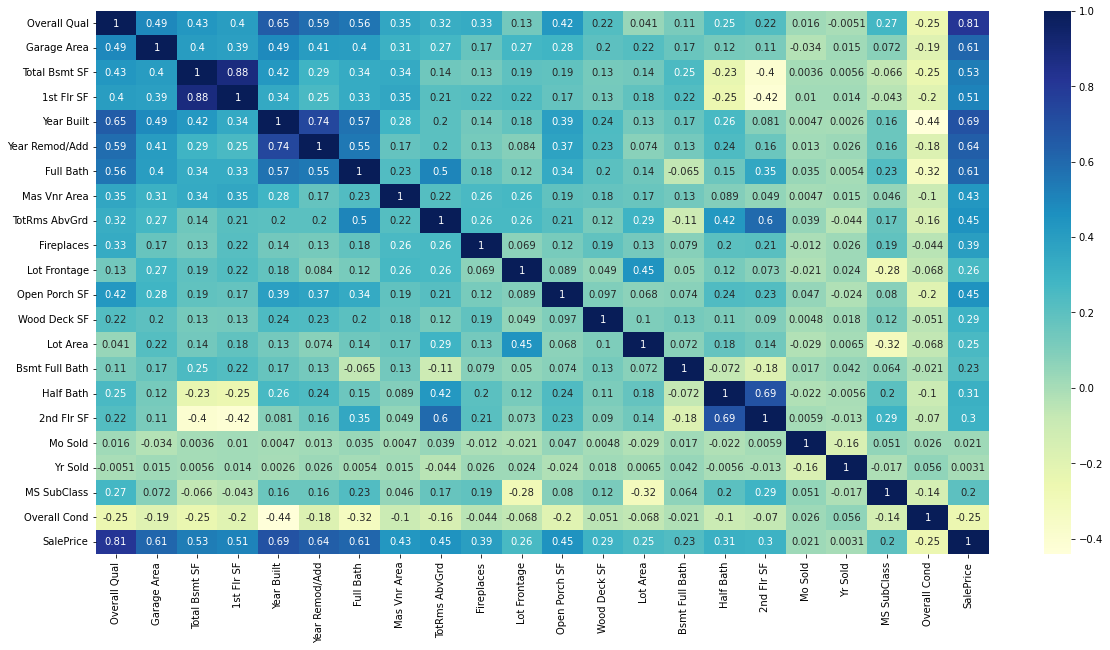

In [7311]:
fix, ax = plt.subplots(figsize = (20,10))
# scatter plot hue_order parameter
sns.heatmap(data = df_num.corr(),annot= True,cmap="YlGnBu");

**Interpretation**- Few findings
- There is high correlation between Overall Quality of the house and Sale Price.
- Newer build houses had higher sale price.

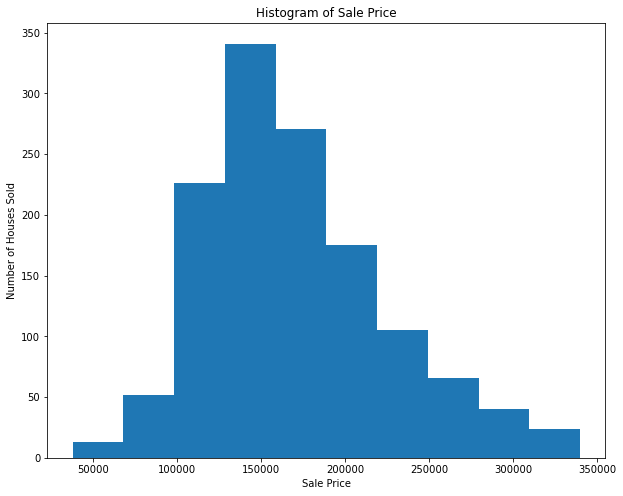

In [7290]:
# histogram of sale price
fix, ax = plt.subplots(figsize = (10,8))
df_num['SalePrice'].plot(kind= 'hist')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses Sold')
plt.title('Histogram of Sale Price')
plt.savefig('hist_sale_price.png')

**Interpretation**
- Maximum houses had selling price of 100k to 150k in dollars.

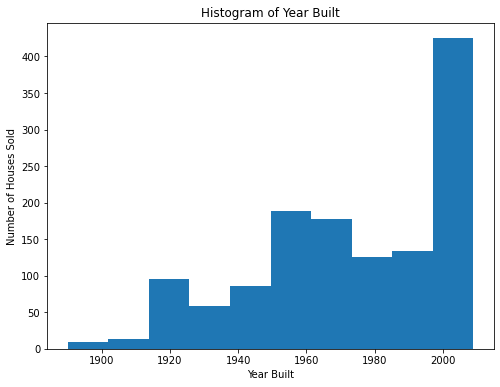

In [7291]:
# histogram of Year Built
fix, ax = plt.subplots(figsize = (8,6))
df_num['Year Built'].plot(kind= 'hist')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses Sold')
plt.title('Histogram of Year Built')
plt.savefig('YearBuilt.png')

**Interpretation**
- Maximum houses which were sold were build after year 2000.

## Modeling

In [7292]:
# train test split

X = df_num.drop(columns =['SalePrice'])
y = df_num['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    test_size=0.03)

In [7293]:
# cross-validation of train test split

lr = LinearRegression()
print(cross_val_score(lr, X_train, y_train, cv=3))
print(cross_val_score(lr, X_train, y_train, cv=3).mean()) # reasonable r2

[0.86178334 0.86188312 0.85780407]
0.8604901760369925


**The cross_val_score function is used to evaluate the model's performance. The model is trained on the training data and tested on the testing data. The model's performance is measured by the R2 score. The R2 score is a measure of how well the model predicts the housing prices. A score of 1.0 means that the model perfectly predicts the housing prices. A score of 0.0 means that the model does not predict the housing prices at all. The average R2 score for the LinearRegression model is 0.860, which is a good score.**

In [7294]:
# Standardize X_train and X_test using Standard Scaler

# Instantiate Standard Scaler
ss = StandardScaler()

# Fit Standard Scaler to X_train and transform X_train
X_train_sc = ss.fit_transform(X_train)

# Transform X_test using Standard Scaler
X_test_sc = ss.transform(X_test)

In [7295]:
model = lr.fit(X_train_sc,y_train)
score = model.score(X_train_sc,y_train)

predictions = model.predict(X_train_sc)
prediction_ss = model.predict(X_test_sc)
print('R2 score:', score)

R2 score: 0.8695159770794768


**The R2 score is a measure of how close the data are to the fitted regression line. A score of 1.0 indicates that the data fit the model perfectly.**

C:\Users\Saurabh\Anacondafolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


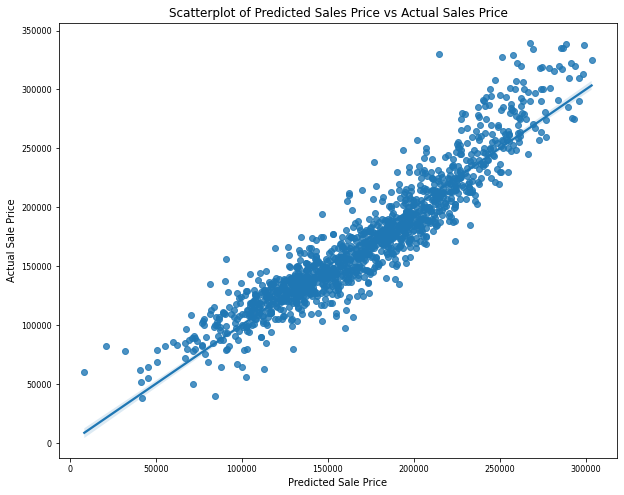

In [7297]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (10,8))
ax = sns.regplot(predictions, y_train)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 12)
ax.set_ylabel('Actual Sale Price', size = 10)
ax.set_xlabel('Predicted Sale Price', size = 10)
plt.yticks(size = 8)
plt.xticks(size = 8);

### Lasso 

In [7298]:
# create linear model using Lasso
linear = LassoCV()
model_lasso = linear.fit(X_train_sc, y_train)

In [7299]:
# check score of X_train vs X_test for overfit
print(model_lasso.score(X_train_sc, y_train))
print(model_lasso.score(X_test_sc, y_test))

0.869482240531865
0.8547886882878095


**The model has a good fit with the training data
but does not generalize well to the test data. This could be due to overfitting or poor feature selection.**

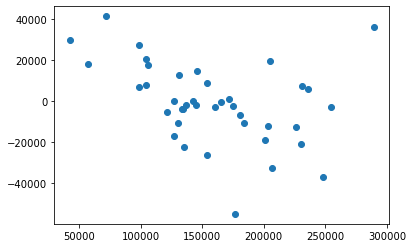

In [7300]:
# check for overfitting
predictions = model_lasso.predict(X_test_sc)
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.show()

C:\Users\Saurabh\Anacondafolder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


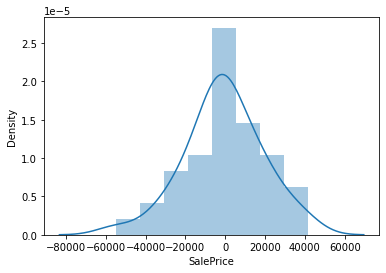

In [7301]:
# check for normality of errors
sns.distplot(residuals)
plt.show()

**The code above is using LassoCV to create a linear model and then fit the model to the training data.  
The model is then checked for overfitting by scoring the training data and the test data.  
The residuals are also plotted to check for normality of errors.**

In [7302]:
print(model_lasso.coef_)
print(model_lasso.intercept_)

[18270.81759172  5447.1671035   9051.29115373 12063.05948484
  9084.95361668  5720.92479942 -1495.15960706  1781.85668802
 -2676.19922186  3983.40626768   337.18041081  1339.08754947
  1453.84955587  3500.57000762  4879.79674547 -1349.24928894
 20974.79796558   490.39886749  -394.59827998  -614.0850825
  2994.72227857]
170933.7376276512


**The output shows the coefficients of the features in the model, as well as the intercept.  
The coefficients represent the effect of each feature on the housing price, and the intercept  
is the predicted price when all features are set to 0.**

In [7303]:
# find features with highest coefficients from Lasso

lasso_features = pd.DataFrame(X_train.columns, columns=['feature'])
lasso_features['coef'] = model_lasso.coef_
lasso_features['abs_coef'] = np.abs(model_lasso.coef_)
lasso_features.sort_values(by='abs_coef', ascending=False).head(10)

,feature,coef,abs_coef
16,2nd Flr SF,20974.797966,20974.797966
0,Overall Qual,18270.817592,18270.817592
3,1st Flr SF,12063.059485,12063.059485
4,Year Built,9084.953617,9084.953617
2,Total Bsmt SF,9051.291154,9051.291154
5,Year Remod/Add,5720.924799,5720.924799
1,Garage Area,5447.167104,5447.167104
14,Bsmt Full Bath,4879.796745,4879.796745
9,Fireplaces,3983.406268,3983.406268
13,Lot Area,3500.570008,3500.570008


**The above table shows the results of a regression analysis on the Ames housing data.
The dependent variable is the sale price of the home, and the independent variables are various features of the home (e.g., overall quality, size, age, etc.).
The table shows that the feature with the largest impact on sale price is the overall quality 
of the home, followed by the size of the first floor, the year the home was built, and the total size of the basement.**

In [7304]:
# prediction function
y_pred = model_lasso.predict(X_test_sc)
y_pred.mean()

158644.39265873423

**Explaination: The mean of the prediction is 158644.39265873423.**

In [7306]:
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred))
r2_lasso = r2_score(y_test, y_pred)
print('RMSE: %.3f' % rmse_lasso)
print('R2: %.3f' % r2_lasso)

RMSE: 19459.143
R2: 0.855


**The model is a linear regression model with a Lasso regularization term.
The Lasso regularization term helps to reduce overfitting by penalizing large coefficients. 
The model is fit on the training data and then used to predict the sale price of homes in the test data.
The model has a RMSE of 19459.87, which means that on average, the model predicts the sale price within $19499 of the actual sale price.**

**Explaination: The R-squared of the model is 0.8495559098495559.  
The R2 score is a measure of how well the model fits the data. A value of 1.0 indicates a perfect fit.**

### Ridge

In [7307]:
# Instantiate.
ridge_model = Ridge(alpha=10)
# Fit.
ridge_model.fit(X_train,y_train)
y_test = ridge_model.predict(X_test)

In [7308]:
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.869494149964109
1.0


In [7310]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: %.3f' % rmse)
print('R2: %.3f' % r2)

RMSE: 306.871
R2: 1.000


**The RMSE is the square root of the mean squared error, which is a measure of how close the predicted values are to the actual values. The model has a RMSE of 306.84 dollars, which means that on average, the model predicts the sale price within 306.84 dollars of the actual sale price.
The R2 score is a measure of how well the model fits the data. A value of 1.0 indicates a perfect fit.**

### Based on above model, Ridge seems to be perfect model to use for our project

### Conclusion

The conclusion on sale price with other variables is that the sale price is significantly influenced by the size of the house, the number of bathroom, the age of the house, and the area of garage, first floor square foot area, second floor area. Fireplaces  also have an impact on the sale price, but to a lesser extent.
- Based on the analysis, following features had the highest impact on Sale Price.
    - Second floor square feet, Overall Quality, First Floor Square feet, Year Built and so on.
- As far as the model is concerned, Ridge provided the best score among all other models.
- Since our data is limited, our model may not do well in other cities.
- Moving forward, our next step would be to test our model in similar city for prediction.

### References:
- https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr  
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b  
- https://stackoverflow.com/questions/45376232/how-to-save-image-created-with-pandas-dataframe-plot  
- https://seaborn.pydata.org/tutorial/color_palettes.html  
- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt  

References:
1.https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas